<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Montar el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Instagram.csv', encoding = 'latin1')

In [5]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [6]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.3+ KB


In [8]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000
max,16062.000000,4137.000000,11817.000000,2355.000000,1115.000000,668.000000,19.000000,41.00000,416.000000,347.000000,100.000000


In [9]:
#Visualizar variables categoricas
data.describe(include = 'O')

,Caption,Hashtags
count,99,99
unique,75,44
top,Here are some of the best data science project...,#data #datascience #dataanalysis #dataanalytic...
freq,3,16


In [10]:
#Saber si hay valores Null en las columnas
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [11]:
data = data.dropna()

In [13]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## Analyzing Instagram Reach

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


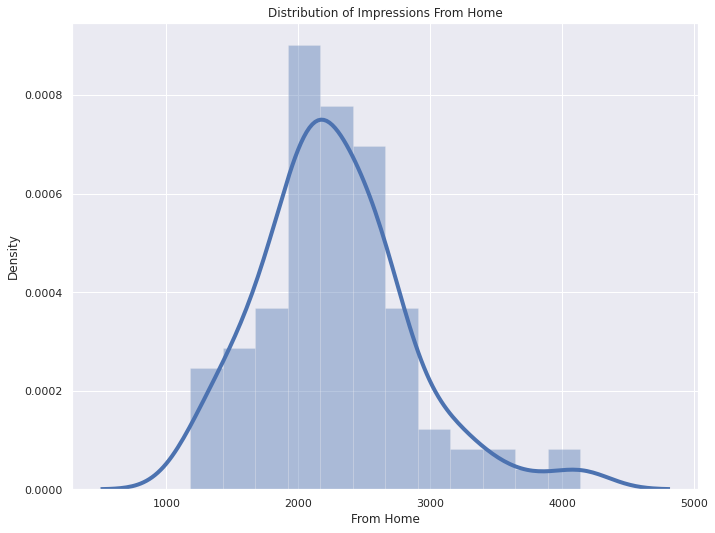

In [18]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Home")
plt.style.use('fivethirtyeight')
sns.distplot(data['From Home'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


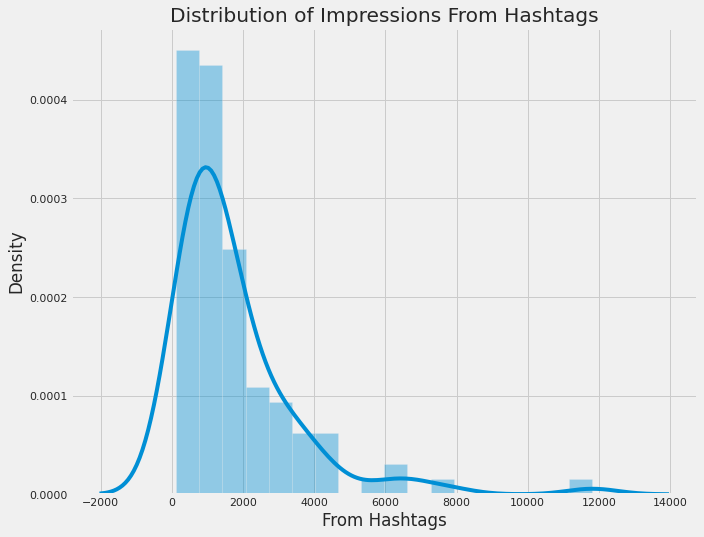

In [19]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


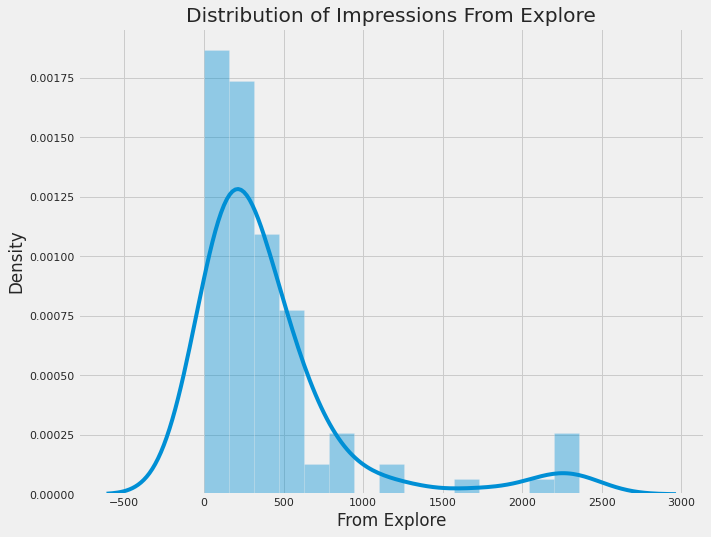

In [20]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [23]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
        title="Impressions on Instagram Posts From Various Sources", hole=0.5)
fig.show()

## Analyzing Content

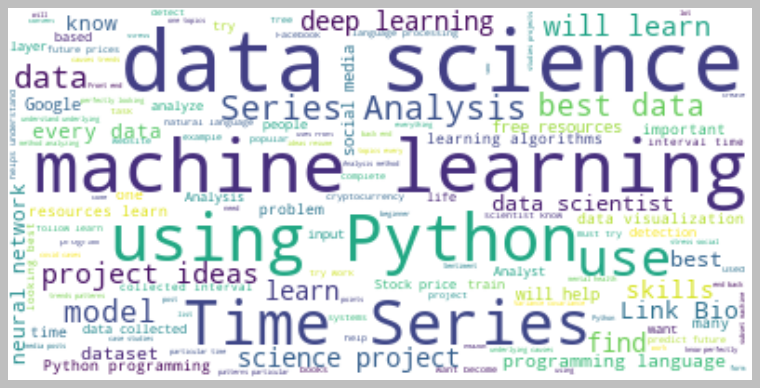

In [24]:
#wordcloud caption column
text= " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

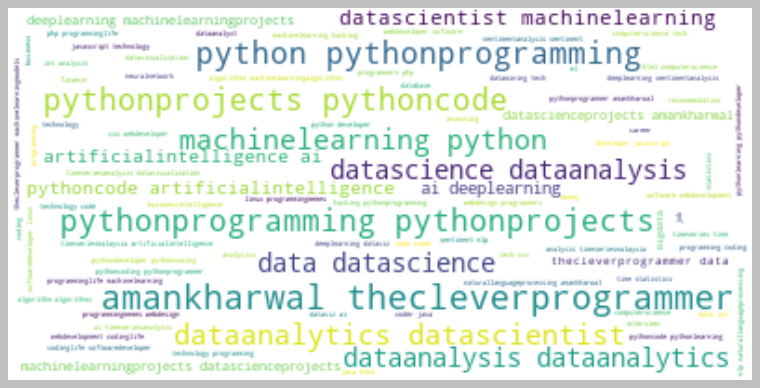

In [26]:
#wordcloud hashtag column
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


## Analyzing Relationships

In [27]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes",size="Likes",trendline="ols",
                    title="Relationship Between Likes and Impressions")
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [28]:
figure = px.scatter(data_frame = data, x = "Impressions",
                    y = "Comments", size="Comments", trendline="ols",
                    title="Relationship Between Comments and Total Impressions")
figure.show()

In [29]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title="Relationship Between Shares and Total Impressions")
figure.show()

In [30]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves",size="Saves",trendline="ols",
                    title="Relationship Between Post Saves and Total Impressions")
figure.show()

In [31]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


## Analyzing Conversion Rate

In [36]:
conversion_rate = np.round((data['Follows'].sum()/data['Profile Visits'].sum())*100,2)
print(conversion_rate,"%")

31.18 %


In [38]:
figure = px.scatter(data_frame=data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title="Relationship Between Profile Visits and Followers Gained")
figure.show()

## Instagram Reach Prediction Model

In [39]:
x = np.array(data[['Likes','Saves','Comments','Shares',
                  'Profile Visits','Follows']])
y = np.array(data['Impressions'])
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [40]:
model = PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7114757633818303

In [41]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([7361.79572596])